In [1]:
import pandas as pd
import numpy as np
import os


In [2]:

pwd = os.getcwd()

In [3]:
#Reading the dataset in CSV.
dataset = pd.read_csv(pwd + "/credit_risk_dataset.csv")


In [4]:
#Making a copy is a good practise in case we lose the dataset.
dataset1 = dataset.copy()

In [5]:
dataset1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [6]:
#Import module to transform data in numerical data.
from sklearn import preprocessing

In [7]:
labelencoder = preprocessing.LabelEncoder()
dataset1.drop_duplicates(inplace=True)

In [8]:
dataset1.shape

(32416, 12)

In [9]:
#Looking for NA values.
dataset1.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [10]:
#Replace NA values with mean of the column.
dataset1['loan_int_rate'].fillna(dataset1['loan_int_rate'].mean(), inplace=True)
dataset1['person_emp_length'].fillna(dataset1['person_emp_length'].mean(), inplace=True)



In [11]:
#Dataset has been succesfully updated.
dataset1.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [12]:
dataset1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [13]:
#Looking for duplicates in the dataset
dataset1.duplicated().sum()

0

In [14]:
#Replacing the categorical values in numerical values.
dataset1["cb_person_default_on_file"] = labelencoder.fit_transform(dataset1["cb_person_default_on_file"])


In [15]:
dataset1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,0,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,0,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,0,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,0,26


In [16]:
import matplotlib as plt
import seaborn as sns

In [17]:
dataset1.value_counts("cb_person_default_on_file")

cb_person_default_on_file
0    26686
1     5730
Name: count, dtype: int64

<module 'matplotlib' from 'C:\\Users\\user\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\__init__.py'>

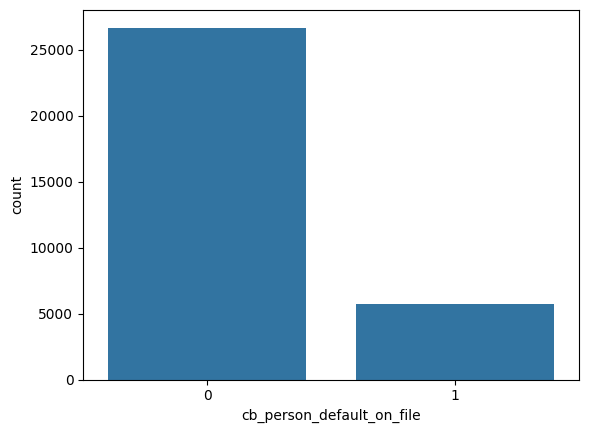

In [18]:
#Visual representation of people with clear credit history and default credit history.
sns.countplot(x="cb_person_default_on_file",data = dataset1)
plt

In [18]:
dataset1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,0,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,0,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,0,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,0,26


In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression

In [21]:
#Scale Standardization/Predict loan amount based on the Age,income and employment history
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = dataset1[["person_age","person_income","person_emp_length","cb_person_default_on_file"]]
y = dataset1["loan_int_rate"]

ScaledX = scale.fit_transform(X)


In [22]:
from sklearn import linear_model


In [23]:
regr =linear_model.LinearRegression()
regr.fit(ScaledX,y)



LinearRegression()

In [24]:
scaled = scale.transform([[30,12000,12,1]])


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
predictLoanAmount = regr.predict(scaled[:2])
print(predictLoanAmount)



[13.94988803]


In [40]:
predictLoanAmountFloat = float(predictLoanAmount)
print(f"The loan interest rate is {predictLoanAmountFloat:,.2f}%,interest rate is based on individual who has 30 Years Old with an annual income of 12,000 and 1 or more default recorder on his file")


The loan interest rate is 13.95%,interest rate is based on individual who has 30 Years Old with an annual income of 12,000 and 1 or more default recorder on his file
